In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%pylab nbagg
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive', 'new_figure_manager']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
data = np.loadtxt("tests.txt"[:])
mean = data[:,0]
stdev = data[:,1]
exposure = np.loadtxt("exposure.txt"[:])
noise  = stdev
signal = mean

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


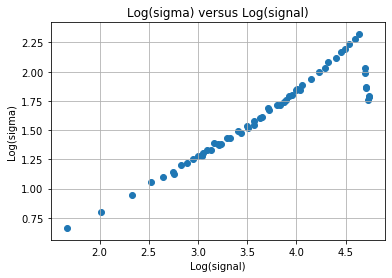

In [3]:
x = log10(mean)
y = log10(stdev)
scatter(x,y)
title('Log(sigma) versus Log(signal)')
ylabel('Log(sigma)')
xlabel('Log(signal)')
grid()
show()

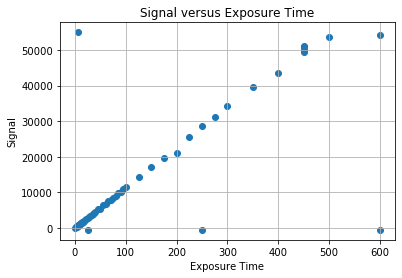

In [4]:
scatter(exposure,signal)
title('Signal versus Exposure Time')
grid()
ylabel('Signal')
xlabel('Exposure Time')
show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


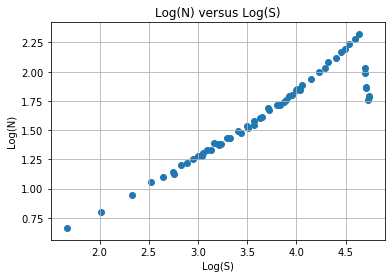

In [5]:
xx = log10(mean) ; yy = log10(stdev)
scatter(xx,yy)
title('Log(N) versus Log(S)')
ylabel('Log(N)')
xlabel('Log(S)')
grid()
show()

In [6]:
biassig = np.loadtxt("biassig.txt"[:],unpack=True) #Read the file

In [7]:
meanres = np.mean(biassig) #Calculate the mean
print("The mean value is:",meanres)
sigres = np.std(biassig)/np.sqrt(2) #Calculate sigma
onereadout = meanres/np.sqrt(2) 
print("A single readout is:",onereadout) #Calculate readout noise for one
Nro2 = (onereadout*onereadout)*(1.0+(1.0/28.0)) #Calculate entire readout noise
print("The readout noise from flat is:",Nro2)

The mean value is: 2.06875
A single readout is: 1.4628271535796702
The readout noise from flat is: 2.216286969866071


[ 15.05502747   3.32574905   3.05919949   2.94499515   2.9528831
   3.00253081 136.23751904   3.01333687   3.07111717   2.38620522
   1.4242131    0.97908678  13.97520259 136.23751904   4.21085742
   5.29648608   9.44035963   9.78609105   1.15810302   1.95468121
   2.18097633   1.70112428   1.31737516 136.23751904   2.67933414
   2.47878849   2.44858038   2.3094007    1.98086522   1.90318672
   1.71795278   1.50585987   1.28975119   1.09082627  16.26040187
   2.91837121   2.82877629   2.72756537   2.74402223   2.91645624
   2.84630699   2.90010164   2.67056606   2.92243872   2.91538272
   2.88507047   2.7946657    2.712428     2.4263964    2.72423881
   3.01487981   2.76396812   2.63396274   2.67958968   2.5923891
   2.69810221   2.14382656   2.36183511   2.42900124   2.01684827
   2.24243314]


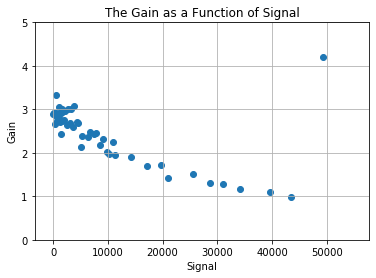

In [8]:
#Before flat-fielding use the equation g = s/((Nt^2)-(Nro^2))
gainbefore = signal/((noise**2)-(Nro2**2))
print(gainbefore)
scatter(signal,gainbefore)
title("The Gain as a Function of Signal")
xlabel("Signal")
ylabel("Gain")
grid()
ylim(0,5)
show()

The re-calculated mean is: [ 5.5014e+04  5.6490e+02  1.1010e+03  1.6230e+03  2.1270e+03  2.7110e+03
 -6.1470e+02  3.2330e+03  3.7320e+03  5.2370e+03  2.0983e+04  4.3420e+04
  5.4331e+04 -6.1470e+02  4.9369e+04  4.9933e+04  5.1051e+04  5.0938e+04
  3.4177e+04  1.1361e+04  8.5060e+03  1.7071e+04  2.8577e+04 -6.1470e+02
  4.5150e+03  6.7810e+03  7.8710e+03  9.0560e+03  1.0168e+04  1.4188e+04
  1.9734e+04  2.5520e+04  3.1100e+04  3.9581e+04  5.3626e+04  1.3460e+03
  8.9450e+02  6.7010e+02  1.1240e+03  5.5730e+02  4.4510e+02  7.8010e+02
  3.2970e+02  2.1630e+02  1.0420e+02  4.6410e+01  1.0090e+03  1.2370e+03
  1.4720e+03  1.5860e+03  1.7030e+03  1.9820e+03  2.5560e+03  3.1320e+03
  3.7110e+03  4.2800e+03  5.1410e+03  6.2940e+03  7.4700e+03  9.8050e+03
  1.0933e+04]
The re-calculated standard deviation is: [233.4    13.19   18.68   22.6    25.54   28.46    2.644  31.65   33.26
  42.34   87.12  101.2   234.9     2.644 178.9   189.4   206.4   203.7
  87.26   63.65   54.14   80.14   86.      2.

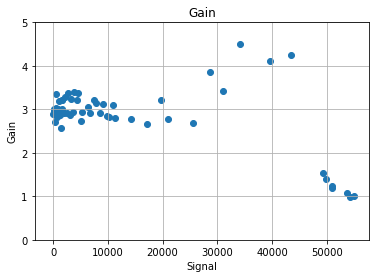

The gain after normalizing flat-fields is: [   1.00997513    3.34133479    3.20029791    3.20847323    3.28555265
    3.36745224 -295.69829447    3.24334441    3.3886742     2.9293581
    2.76638741    4.24167254    0.98473716 -295.69829447    1.54276688
    1.39215368    1.19849146    1.22775368    4.49142106    2.80767357
    2.90681415    2.66006694    3.86641313 -295.69829447    3.37365638
    2.91766889    3.14073639    3.1340758     2.83113775    2.76942767
    3.22548453    2.68373385    3.41899207    4.11584547    1.06790881
    2.95143742    3.00672095    2.81762425    2.87981778    3.03085228
    2.88838094    2.95805965    2.7002242     3.01145807    2.95320736
    2.88898383    2.88879591    2.85856589    2.5645865     2.99720214
    3.21269247    2.91938303    2.90994714    2.86459658    2.94616948
    3.21212087    2.72645533    3.04341881    3.21546097    2.83801425
    3.09145   ]


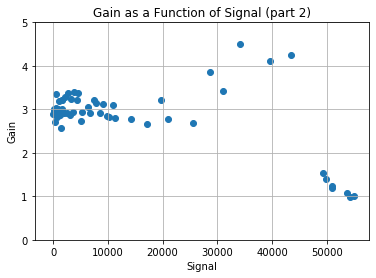

In [15]:
#Re-calculating the gain with normalized flat-fields
data2 = np.loadtxt("testsff.txt"[:]) #Read the file
datamean = data2[:,0]
datastdev = data2[:,1]
print("The re-calculated mean is:",datamean)
print("The re-calculated standard deviation is:",datastdev)
scatter(datamean,gainafter)
title("Gain")
xlabel("Signal")
ylabel("Gain")
ylim(0,5)
grid()
show()
gainafter = datamean/((datastdev**2)-(Nro2**2))
print("The gain after normalizing flat-fields is:",gainafter)

#Plot the gain after re-calculation
scatter(datamean,gainafter)
title("Gain as a Function of Signal (part 2)")
xlabel("Signal")
ylabel("Gain")
ylim(0,5)
grid()
show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


The value of alpha is: [ 0.          0.0015757   0.003618    0.00414497  0.00401509  0.00364872
 -0.          0.00269804  0.00285941  0.00385194  0.00402927  0.0042536
  0.         -0.          0.          0.          0.          0.
  0.00433022  0.00369873  0.00366879  0.00352332  0.00418476 -0.
  0.00412466  0.0029915   0.00338154  0.00354706  0.00386148  0.00340348
  0.00371298  0.00337946  0.00394031  0.00412585  0.          0.00168882
  0.00483622  0.00418181  0.00391006  0.00481893  0.00339086  0.00294287
  0.00353192  0.00683837  0.0064932   0.00291737  0.00339935  0.0039034
  0.00388414  0.00459113  0.00346298  0.00311733  0.00375331  0.00277407
  0.00353299  0.00372257  0.0044033   0.00388142  0.00367149  0.00382514
  0.00334694]
The nff value is: [0.00000000e+00 8.90112352e-01 3.98341562e+00 6.72728771e+00
 8.54009953e+00 9.89167832e+00 0.00000000e+00 8.72275186e+00
 1.06713308e+01 2.01726151e+01 8.45462335e+01 1.84691418e+02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00

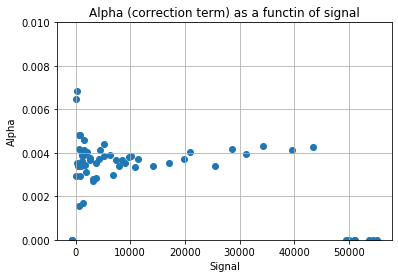

The signal [ 5.5013e+04  5.6490e+02  1.1010e+03  1.6230e+03  2.1270e+03  2.7110e+03
 -6.1460e+02  3.2330e+03  3.7320e+03  5.2370e+03  2.0983e+04  4.3420e+04
  5.4330e+04 -6.1460e+02  4.9368e+04  4.9932e+04  5.1050e+04  5.0937e+04
  3.4176e+04  1.1361e+04  8.5060e+03  1.7071e+04  2.8577e+04 -6.1460e+02
  4.5150e+03  6.7810e+03  7.8710e+03  9.0560e+03  1.0168e+04  1.4188e+04
  1.9734e+04  2.5520e+04  3.1100e+04  3.9581e+04  5.3625e+04  1.3460e+03
  8.9450e+02  6.7010e+02  1.1240e+03  5.5730e+02  4.4510e+02  7.8010e+02
  3.2970e+02  2.1630e+02  1.0420e+02  4.6400e+01  1.0090e+03  1.2370e+03
  1.4720e+03  1.5860e+03  1.7030e+03  1.9820e+03  2.5560e+03  3.1320e+03
  3.7110e+03  4.2800e+03  5.1410e+03  6.2940e+03  7.4700e+03  9.8050e+03
  1.0933e+04]
Mean of alpha 0.0020701358396929995
The second calculation for gain with the alpha term is: [ -5.90859753   3.25884292   3.06209261   2.97978146   3.01368787
   3.0938176  481.96522399   3.12984384   3.21624154   2.51534681
   1.63278201   1.197

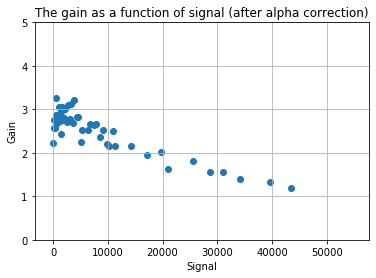

In [16]:
#Solve for alpha
Nff   = np.sqrt((noise**2)-(datastdev**2))

#Disregard "nan" values of Nff
for i in range(61):
    if np.isnan(Nff[i]):
        Nff[i] = 0
alpha = Nff/signal
print("The value of alpha is:",alpha)
print("The nff value is:",Nff)
scatter(signal,alpha)
title("Alpha (correction term) as a functin of signal")
xlabel("Signal")
ylabel("Alpha")
grid()
ylim(0,0.01)
show()

#Just to check for signal
print("The signal",signal)

#Disregard "nan" values of alpha
for i in range(61):
    if np.isnan(alpha[i]):
        alpha[i] = 0
        
#Calculate mean of alpha
meanalpha = np.mean(Nff)/np.mean(signal)
print("Mean of alpha",meanalpha)
alsig = (meanalpha**2)*(signal**2)
gain2 = signal/(((noise**2)-(sigres**2))-alsig)
print("The second calculation for gain with the alpha term is:",gain2)

#Re-plot the gain versus signal
scatter(signal,gain2)
title("The gain as a function of signal (after alpha correction)")
xlabel("Signal")
ylabel("Gain")
ylim(0,5)
grid()
show()